In [29]:
import numpy as np
def loadFileToR(R, file):
    f = open(file, 'r')                   #以读方式打开文件 
    result = list() 
    for line in f.readlines():                              #依次读取每行 
        line = line.strip()                                    #去掉每行头尾空白 
        if not len(line) or line.startswith('#'):       #判断是否是空行或注释行 
            continue                                            #是的话，跳过不处理 
        result.append(line)       
    #保存
    for i in range(len(result)):
        user = int(result[i].split()[0])-1   
        movie = int(result[i].split()[1])-1
        rating = int(result[i].split()[2])-1
        R[user][movie] = rating

def matrix_factorization(R, R_test, P, Q, K, steps=5000, alpha=0.05, beta=0.01):
    Q = Q.T
    error = []
    iter_count = 0
    while  iter_count < steps:
        i = random.randint(0, len(R)-1)
        j = random.randint(0, len(R[i])-1)            
        if R[i][j] > 0:
            iter_count+=1
            eij = R[i][j] - np.dot(P[i,:],Q[:,j])
            for k in range(K):
                P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
       
            e = 0
            for i in range(len(R_test)):
                for j in range(len(R_test[i])):
                    if R_test[i][j] > 0:
                        e = e + pow(R_test[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                        for k in range(K):
                            e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
            #if(iter_count%10 == 0):               
            error.append(e)                
            if e < 0.001:
                break
    return P, Q.T, error    

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random
N = 943
M = 1682
R = np.zeros((N,M))
R_test = np.zeros((N,M))
trainFile = "C:/Users/zhancongcong/Desktop/MLdata/ml-100k/u1.base"
testFile = "C:/Users/zhancongcong/Desktop/MLdata/ml-100k/u1.test"
loadFileToR(R, trainFile)
loadFileToR(R_test,testFile )
print(R.shape)
print(R_test.shape)
K = 10
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
nP, nQ, LOSS_T = matrix_factorization(R, R_test, P, Q, K)

(943, 1682)
(943, 1682)


In [25]:
numOfNuzero = 0 #the number of unzero in testdata
for i in range(len(R_test)):
    for j in range(len(R_test[i])):
        if R_test[i][j] > 0:
            numOfNuzero+=1
print(numOfNuzero)            

18609


[[ 4.15073777  3.28090642  2.38295521 ...,  2.82172723  1.92177459
   2.00965838]
 [ 3.91980021  3.25035865  2.10435366 ...,  2.21380899  1.69187849
   1.83863892]
 [ 2.97952406  3.42912046  2.70236267 ...,  2.63814388  1.70486516
   1.9323134 ]
 ..., 
 [ 3.0838887   3.10838514  2.28817682 ...,  2.35369038  1.94177274
   1.92013359]
 [ 3.38430873  3.44678791  3.00641411 ...,  3.21744608  1.81027918
   2.02293694]
 [ 2.21331715  2.25630302  1.82764273 ...,  1.85568282  1.36057517
   1.29081828]]


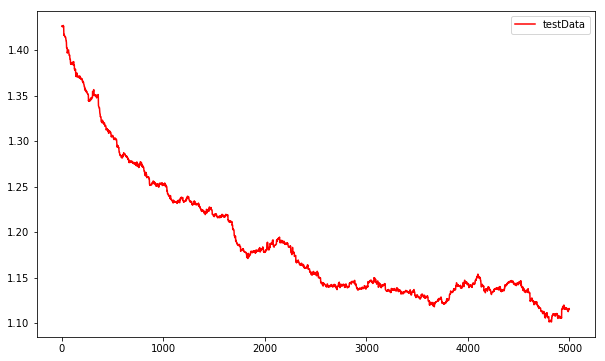

In [27]:
R_new = np.dot(nP, nQ.T)
print(R_new)
LOSS_T = np.array(LOSS_T)
plt.figure(figsize=(10,6))
plt.plot( LOSS_T/numOfNuzero, 'r', label="testData")
plt.legend()
plt.show()

In [28]:
#不带正则化的每个sample的平均loss 
ee = 0
for i in range(len(R_test)):
    for j in range(len(R_test[i])):
        if R_test[i][j] > 0:
            ee = ee + abs(R_test[i][j] - R_new[i][j])
print(ee/numOfNuzero)                        

0.833856816119
